

# Project: Investigate a Dataset - [Medical Appointment No Shows]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
    <ul>
    <li>ScheduledDay : what day the patient set up their appointment.</li>
    <li>Neighborhood : location of the hospital</li>
    <li>Scholarship : whether or not the patient is enrolled in Brasilian welfare program</li>
    </ul>



### Question(s) for Analysis
>What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [1]:
# Use this cell to set up import statements for all of the packages that you plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import matplotlib.ticker as ticker
import seaborn as sns

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling




### General Properties



In [2]:
# Load the data
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')

In [3]:
# Show few rows
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# Show the shape (rows,columns)
df.shape

(110527, 14)

In [5]:
# Show some useful descriptive statistics about the data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<ul>
    <li> The majority of ages are between 18 to 55 </li>
    <li> oops! there is a mistake in minimum age whish is -1 </li>
    <li> The maximum age is 115 !  :) "to old" </li>
    <li> The average age is 37 years old</li>
    <li> 75% of the patient receives SMS massege To confirm the appointment reservation </li>
</ul>

In [6]:
# let's show the unique vlaues for each columns
print('Age',sorted(df.Age.unique()))
print('Scholarship',sorted(df.Scholarship.unique()))
print('Hipertension',sorted(df.Hipertension.unique()))
print('Diabetes',sorted(df.Diabetes.unique()))
print('Alcoholism',sorted(df.Alcoholism.unique()))
print('Handcap',sorted(df.Handcap.unique()))
print('SMS_received',sorted(df.SMS_received.unique()))

Age [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
Scholarship [0, 1]
Hipertension [0, 1]
Diabetes [0, 1]
Alcoholism [0, 1]
Handcap [0, 1, 2, 3, 4]
SMS_received [0, 1]


We have some imposible ages -1 we will drop it .

In [7]:
# Show each column type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB



### Data Cleaning



In [8]:
df.query('Age==-1')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [9]:
# removing impossible age
df.drop(index=99832,inplace=True)

In [10]:
# Show the number of duplicated row if there are
df.duplicated().sum()

0

In [11]:
# Drop unnecessary columns (those are specific to the patient)
unnecessary = ['PatientId','AppointmentID','ScheduledDay','AppointmentDay']
df.drop(unnecessary, axis=1, inplace=True)

In [12]:
# Check drop cell 
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
# Checking for Nan values  
df.isnull().any()

Gender           False
Age              False
Neighbourhood    False
Scholarship      False
Hipertension     False
Diabetes         False
Alcoholism       False
Handcap          False
SMS_received     False
No-show          False
dtype: bool

No missing vlaues :)

In [14]:
# Rename column using "_"instead of "-" good practice :)
df.rename(columns={'No-show':'No_show'},inplace=True)

In [15]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis 

### Research Question  (Is There a Correlation Between The Number Of Patient Who Showed and Each of  Gender, Age, Neighbourhood, Scholarship, Hipertension, Diabetes, Alcoholism,  Handcap, SMS_received)

In [16]:
# First Assigning new names :
show =  df.No_show == 'No'
no_show = df.No_show == 'Yes'

In [17]:
# show the number of patient who showed
df[show].count()

Gender           88207
Age              88207
Neighbourhood    88207
Scholarship      88207
Hipertension     88207
Diabetes         88207
Alcoholism       88207
Handcap          88207
SMS_received     88207
No_show          88207
dtype: int64

In [18]:
# Show the number of patient who did not show
df[no_show].count()

Gender           22319
Age              22319
Neighbourhood    22319
Scholarship      22319
Hipertension     22319
Diabetes         22319
Alcoholism       22319
Handcap          22319
SMS_received     22319
No_show          22319
dtype: int64

From the previous: The number of patient who showed is about 4 times those who did not show.

$\frac{88208}{22319}$=4

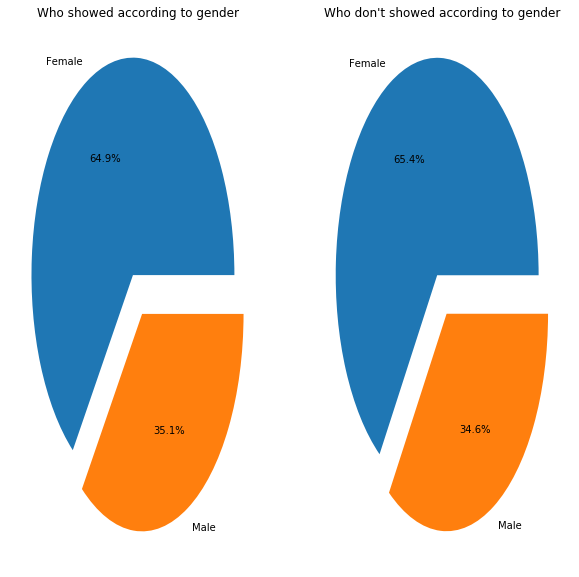

In [19]:
# plot between the number of patient who showed or not according to Gender 
figure, axes=plt.subplots(1,2,figsize=(10,10))
labels=['Female','Male']
explode=(0.1,0.1)
axes[0].pie(df.Gender[show].value_counts(),labels=labels,explode=explode,autopct='%1.1f%%')
axes[0].set_title("Who showed according to gender")
axes[1].pie(df.Gender[no_show].value_counts(),labels=labels,explode=explode,autopct='%1.1f%%')
axes[1].set_title("Who don\'t showed according to gender");

Gender is insignificant

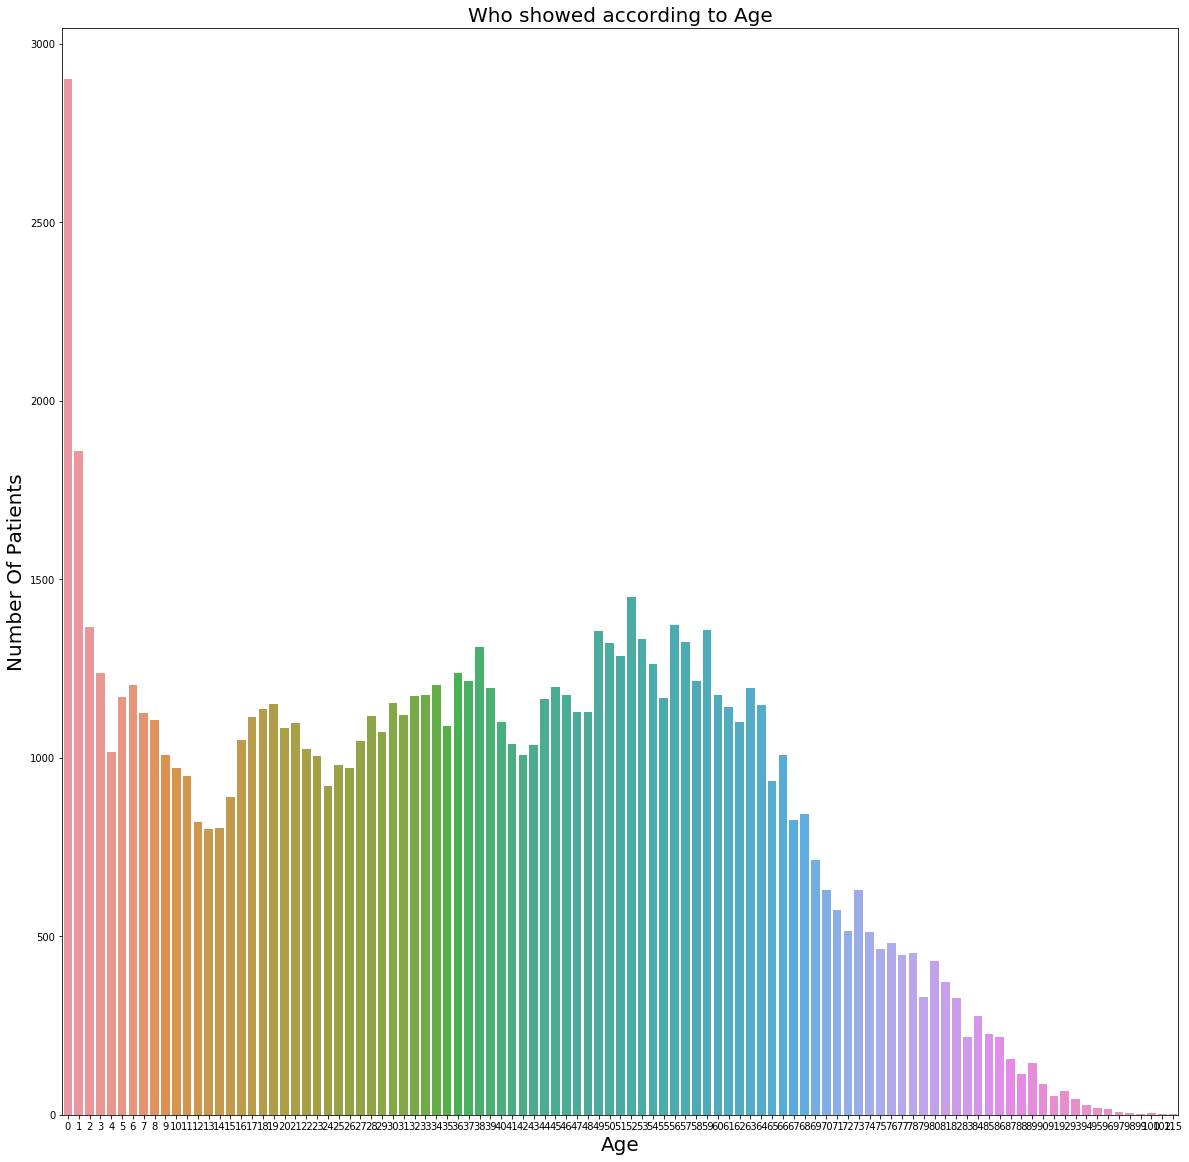

In [20]:
# plot between the number of patient who showed and the Age
plt.figure(figsize=[20,20])
sns.countplot(x=df.Age[show],data=df)
plt.xlabel('Age', fontsize=20)
plt.ylabel('Number Of Patients', fontsize=20);
plt.title('Who showed according to Age', fontsize=20);

In [21]:
df.Age[show].value_counts()

0      2900
1      1858
52     1449
56     1372
2      1366
59     1357
49     1354
53     1332
57     1325
50     1322
38     1309
51     1284
54     1262
3      1236
36     1236
58     1216
37     1216
6      1205
34     1204
45     1198
39     1196
63     1195
46     1177
33     1176
60     1175
32     1174
5      1169
55     1168
44     1164
30     1152
       ... 
72      514
74      513
76      480
75      463
78      452
77      448
80      430
81      371
79      329
82      326
84      276
85      226
83      219
86      218
87      157
89      144
88      114
90       86
92       66
91       53
93       43
94       27
95       18
96       16
97        9
98        5
100       4
102       2
115       2
99        1
Name: Age, Length: 103, dtype: int64

It is clear that the number of younger patient who showed is larger than the older

In [22]:
#show the number of unique neighbourhood that the patient showed from (for explode used in next cell)
len(df.Neighbourhood[show].unique())

80

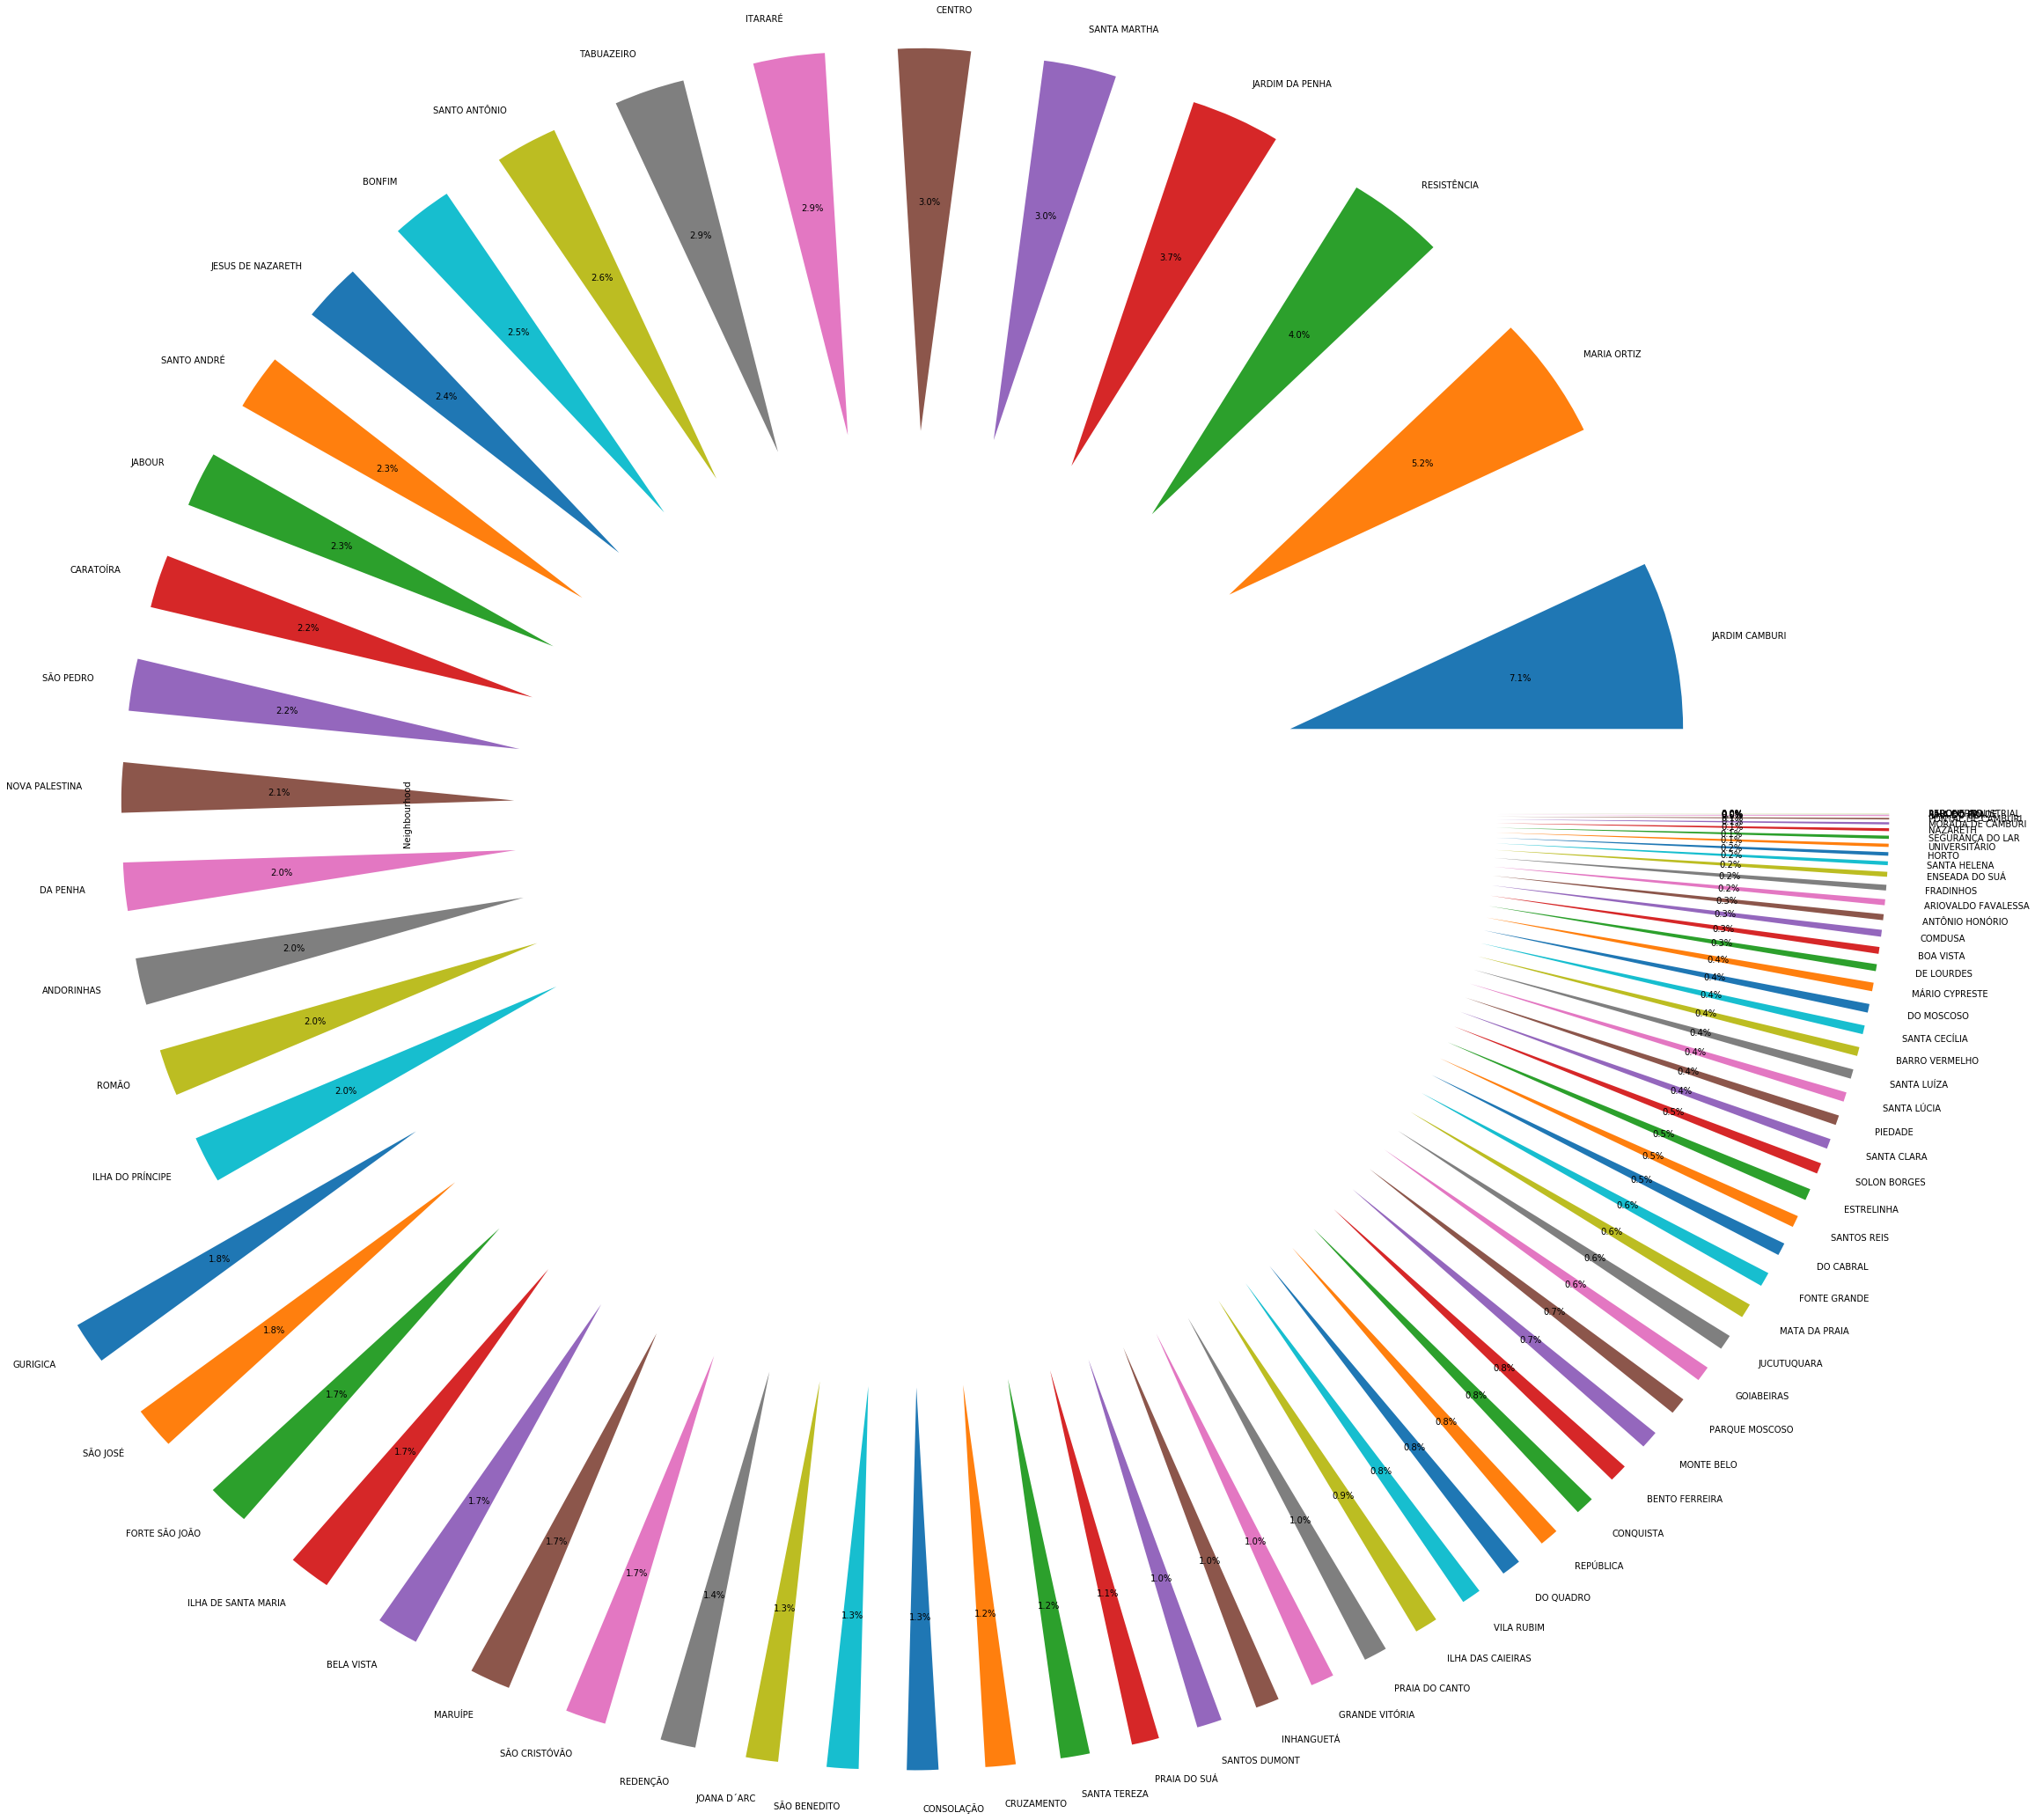

In [23]:
# show the number of patient who showded according to the lacation of the hospital
plt.figure(figsize=[20,20])
explode=tuple([1]*20)+tuple([1.5]*60)
df.Neighbourhood[show].value_counts().plot(kind='pie',explode=explode,autopct='%1.1f%%');

In [24]:
df.Neighbourhood[show].value_counts()

JARDIM CAMBURI         6252
MARIA ORTIZ            4586
RESISTÊNCIA            3525
JARDIM DA PENHA        3246
SANTA MARTHA           2635
CENTRO                 2631
ITARARÉ                2591
TABUAZEIRO             2559
SANTO ANTÔNIO          2262
BONFIM                 2223
JESUS DE NAZARETH      2157
SANTO ANDRÉ            2063
JABOUR                 2058
CARATOÍRA              1974
SÃO PEDRO              1933
NOVA PALESTINA         1862
DA PENHA               1788
ANDORINHAS             1741
ROMÃO                  1740
ILHA DO PRÍNCIPE       1734
GURIGICA               1562
SÃO JOSÉ               1549
FORTE SÃO JOÃO         1543
ILHA DE SANTA MARIA    1524
BELA VISTA             1523
MARUÍPE                1478
SÃO CRISTÓVÃO          1473
REDENÇÃO               1278
JOANA D´ARC            1169
SÃO BENEDITO           1152
                       ... 
DO CABRAL               472
SANTOS REIS             435
ESTRELINHA              432
SOLON BORGES            400
SANTA CLARA         

It is clear that the location of the hospital affects the number of showed patient 

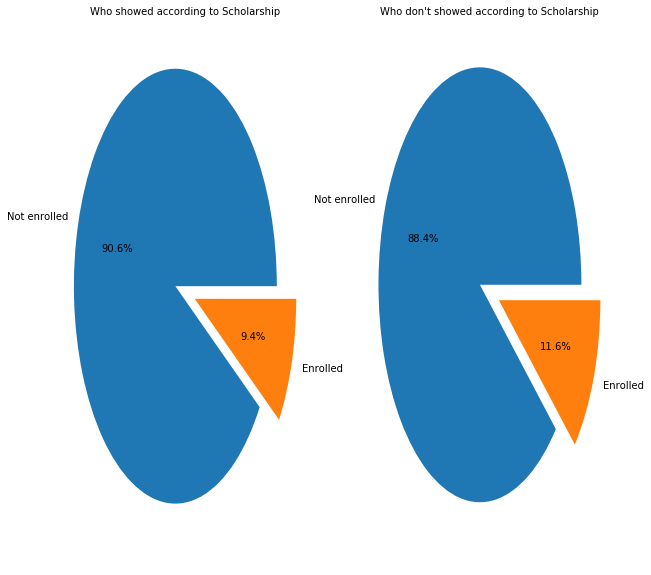

In [25]:
# plot between the number of patient who showed or not and Scholarship
figure, axes=plt.subplots(1,2,figsize=(10,10))
labels=['Not enrolled','Enrolled']
explode=(0.1,0.1)
axes[0].pie(df.Scholarship[show].value_counts(),labels=labels,explode=explode,autopct='%1.1f%%')
axes[0].set_title("Who showed according to Scholarship",fontsize=10)
axes[1].pie(df.Scholarship[no_show].value_counts(),labels=labels,explode=explode,autopct='%1.1f%%')
axes[1].set_title("Who don\'t showed according to Scholarship",fontsize=10);

<ul>
    <li>Most patient are not enrolled in Brasilian welfare program (Bolsa Família)</li>
    <li>scholarship is insignificant</li>
</ul>

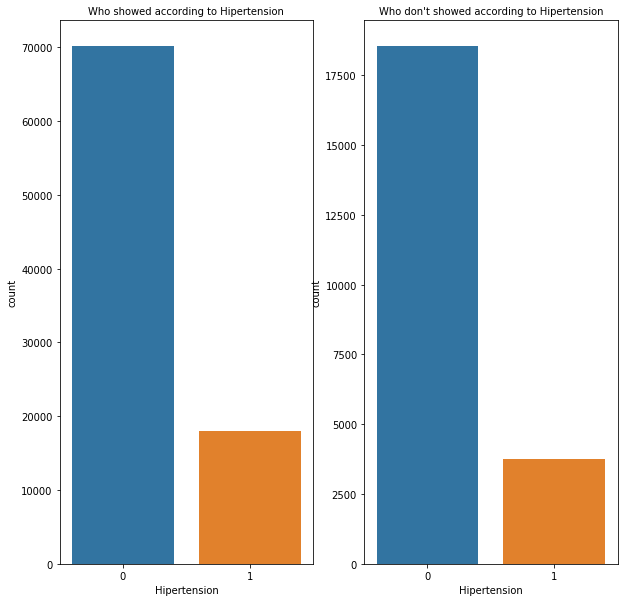

In [26]:
# plot between the number of patient who showed or not and Hipertension
figure, axes=plt.subplots(1,2,figsize=(10,10))
sns.countplot(df.Hipertension[show], ax=axes[0])
axes[0].set_title("Who showed according to Hipertension",fontsize=10)
sns.countplot(df.Hipertension[no_show], ax=axes[1])
axes[1].set_title("Who don\'t showed according to Hipertension",fontsize=10);

In [27]:
df['Hipertension'].value_counts()

0    88725
1    21801
Name: Hipertension, dtype: int64

 who suffers from hipertension=$\frac{21801}{110527}$x100=19.7%

Hipertension is insignificant

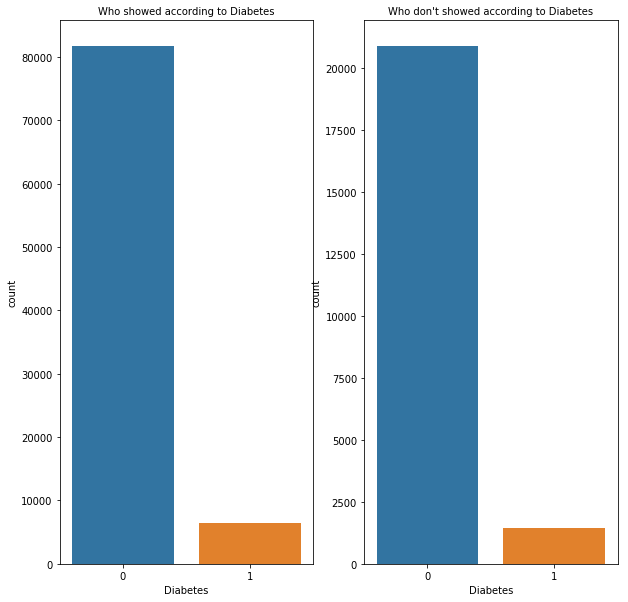

In [28]:
# plot between the number of patient who showed or not and Diabetes
figure, axes=plt.subplots(1,2,figsize=(10,10))
sns.countplot(df.Diabetes[show], ax=axes[0])
axes[0].set_title("Who showed according to Diabetes",fontsize=10)
sns.countplot(df.Diabetes[no_show], ax=axes[1])
axes[1].set_title("Who don\'t showed according to Diabetes",fontsize=10);

diabetes is insignificant

In [ ]:
# plot between the number of patient who showed or not and Alcoholism
figure, axes=plt.subplots(1,2,figsize=(10,10))
sns.countplot(df.Alcoholism[show], ax=axes[0])
axes[0].set_title("Who showed according to Alcoholism",fontsize=10)
sns.countplot(df.Alcoholism[no_show], ax=axes[1])
axes[1].set_title("Who don\'t showed according to Alcoholism",fontsize=10);

Alcoholism is insignificant

In [ ]:
# plot between the number of patient who showed or not and Handcap
figure, axes=plt.subplots(1,2,figsize=(10,10))
sns.countplot(df.Handcap[show], ax=axes[0])
axes[0].set_title("Who showed according to Handcap",fontsize=10)
sns.countplot(df.Handcap[no_show], ax=axes[1])
axes[1].set_title("Who don\'t showed according to Handcap",fontsize=10);

Handcap is insignificant

In [ ]:
# plot between the number of patient who showed or not and SMS_received
figure, axes=plt.subplots(1,2,figsize=(10,10))
sns.countplot(df.SMS_received[show], ax=axes[0])
axes[0].set_title("Who showed according to SMS_received",fontsize=10)
sns.countplot(df.SMS_received[no_show], ax=axes[1])
axes[1].set_title("Who don\'t showed according to SMS_received",fontsize=10);

<ul>
    <li>The number of patient who recieved the SMS massenge is half the number of those who did not</li>
    <li>SMS_received is insignificant</li>
</ul>

<a id='conclusions'></a>
## Conclusions
<ul>
    <li>It is clear that the location of the hospital affects the number of showed patient</li>
    <li>younger patient showed more than the older</li>
</ul>
limitation : There is no direct correlation between the number of showed patient and hipertension, diabetes, alcoholism, Scholarship, handcap

## Submitting your Project 



In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])